In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [2]:

df=pd.read_csv('/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')
df.head(5)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [4]:
def missing(df):
    total=df.isnull().sum()
    percent=df.isnull().sum()/len(df)
    return pd.concat([total,percent],axis=1,keys=['total','percent'])


In [5]:
missing(df)

,total,percent
Timestamp,0,0.000000
Open,1243608,0.256025
High,1243608,0.256025
Low,1243608,0.256025
Close,1243608,0.256025
Volume_(BTC),1243608,0.256025
Volume_(Currency),1243608,0.256025
Weighted_Price,1243608,0.256025


In [6]:
df['Timestamp']=pd.to_datetime(df['Timestamp'], unit='s')

In [7]:
df=df.dropna().reset_index(drop=True)

In [8]:

import matplotlib.pyplot as plt

In [9]:
df = df.set_index('Timestamp')

In [10]:
df_day=df.resample('D').mean()
df_month=df.resample('M').mean()
df_year=df.resample('Y').mean()
df_quarter=df.resample('Q').mean()

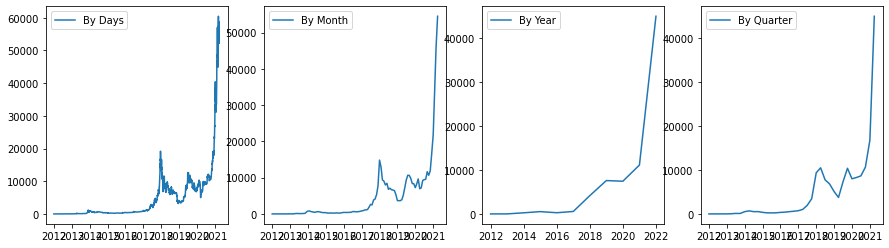

In [11]:
fig = plt.figure(figsize=[15, 4])
plt.subplot(141)
plt.plot(df_day.Weighted_Price, '-', label='By Days')
plt.legend()

plt.subplot(142)
plt.plot(df_month.Weighted_Price, '-', label='By Month')
plt.legend()

plt.subplot(143)
plt.plot(df_year.Weighted_Price, '-', label='By Year')
plt.legend()

plt.subplot(144)
plt.plot(df_quarter.Weighted_Price, '-', label='By Quarter')
plt.legend()

In [12]:
from scipy import stats
import statsmodels.api as sm

<Figure size 5760x5760 with 0 Axes>

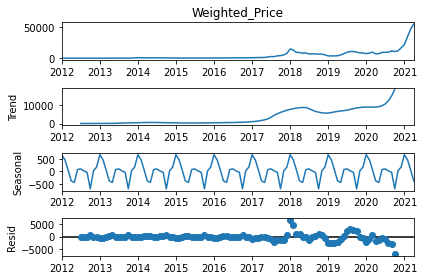

In [13]:
plt.figure(figsize=[80,80])
sm.tsa.seasonal_decompose(df_month.Weighted_Price).plot()
plt.show()

In [14]:
print('test:p=%f'% sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

test:p=0.998833


In [15]:
print('test:p=%f'% sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

test:p=0.998833


In [16]:
df_month.Weighted_Price = np.log(df_month.Weighted_Price)

In [17]:
print('test:p=%f'% sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

test:p=0.723272


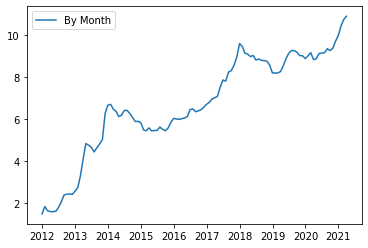

In [18]:

plt.plot(df_month.Weighted_Price, '-', label='By Month')
plt.legend()

In [19]:
df_month.Weighted_Price =df_month.Weighted_Price.diff()

In [20]:
df_month = df_month.drop(df_month.index[0])

In [21]:
print('test:p=%f'% sm.tsa.stattools.adfuller(df_month.Weighted_Price)[1])

test:p=0.000000


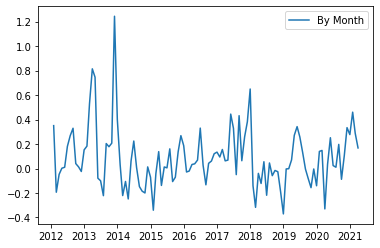

In [22]:
plt.plot(df_month.Weighted_Price, '-', label='By Month')
plt.legend()

In [23]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [24]:
model = SARIMAX(df_month.Weighted_Price, order=(3, 1, 3), seasonal_order=(2, 1, 2, 4))

In [25]:
res = model.fit()

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [26]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                         Weighted_Price   No. Observations:                  111
Model:             SARIMAX(3, 1, 3)x(2, 1, [1, 2], 4)   Log Likelihood                   3.193
Date:                                Thu, 24 Jun 2021   AIC                             15.614
Time:                                        14:41:35   BIC                             44.912
Sample:                                    01-31-2012   HQIC                            27.489
                                         - 03-31-2021                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5152      0.198      2.605      0.009       0.128       0.903
ar.L2         -0.9622      0.427     -2.256      0.024      -1.798      -0.126
ar.L3          0.4731      0.164      2.887      0.004       0.152       0.794
ma.L1         -1.1173      1.036     -1.079      0.281      -3.147       0.913
ma.L2          1.0569      0.336      3.148      0.002       0.399       1.715
ma.L3         -0.9340      0.946     -0.987      0.324      -2.789       0.921
ar.S.L4       -1.0177      0.213     -4.782      0.000      -1.435      -0.601
ar.S.L8       -0.0557      0.167     -0.333      0.739      -0.384       0.272
ma.S.L4       -0.1038     10.899     -0.010      0.992     -21.465      21.258
ma.S.L8       -0.8931      9.767     -0.091      0.927     -20.036      18.250
sigma2         0.0451      0.464      0.097      0.923      -0.864       0.954
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.09
Prob(Q):                              0.97   Prob(JB):                         0.21
Heteroskedasticity (H):               0.55   Skew:                            -0.02
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.83
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
df_month['sarimax'] = res.fittedvalues

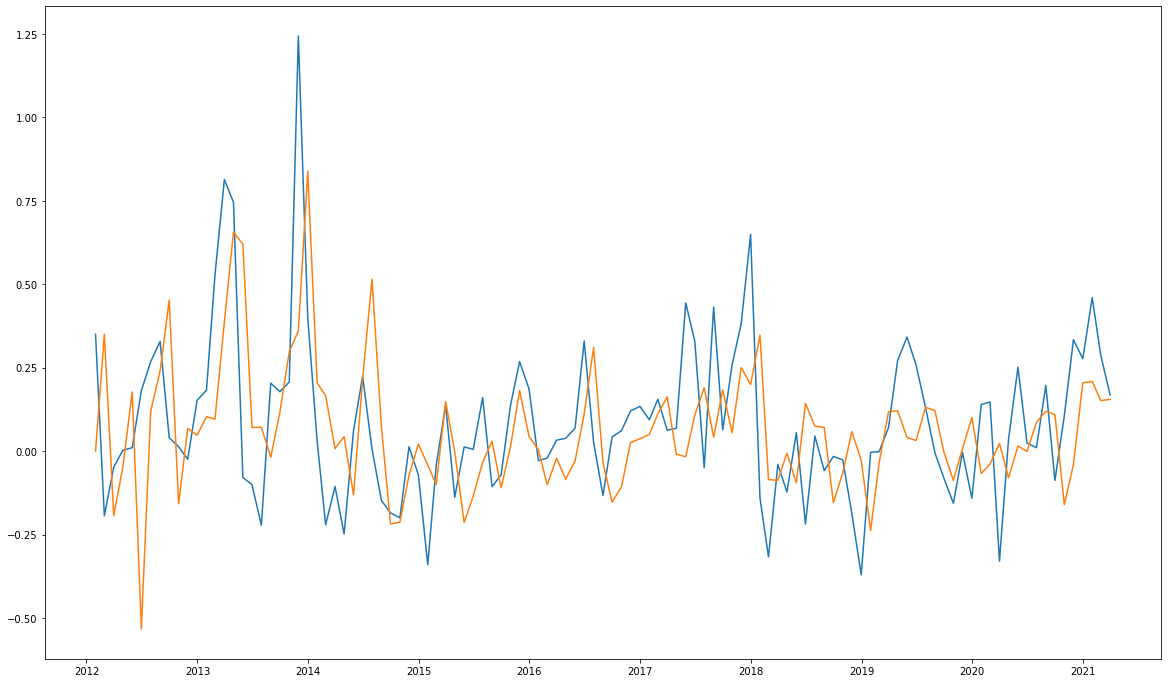

In [28]:
plt.figure(figsize=(20, 12))
plt.plot(df_month.Weighted_Price)
plt.plot(df_month['sarimax'])
plt.show()

In [29]:
forecast = res.predict(start=len(df_month), end=len(df_month) + 8)

In [30]:
forecast = df_month['sarimax'].append(forecast)

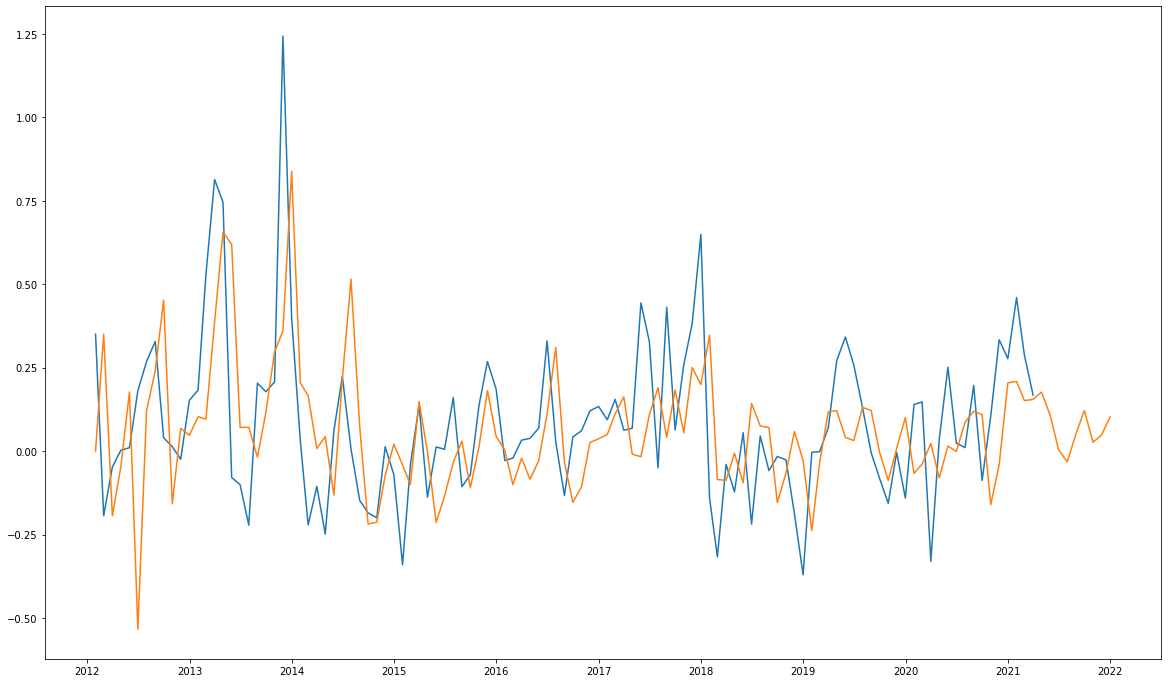

In [31]:
plt.figure(figsize=(20, 12))
plt.plot(df_month.Weighted_Price)
plt.plot(forecast)
plt.show()

In [32]:
from itertools import product
p = range(0, 2, 1)
d = 1
q = range(0, 2, 1)
ps = range(0, 2, 1)
ds = 1
qs = range(0, 2, 1)
s = 4
params = list(product(p, q, ps, qs))
params

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [33]:
results = []
for order in params:
    try:
        model = SARIMAX(df_month.Weighted_Price, order=(order[0], d, order[1]), seasonal_order=(order[2], ds, order[3], s))
        res = model.fit()
        results.append([order, res.aic])
    except:
        continue

In [34]:
r = pd.DataFrame(results)
r.columns = ('order', 'AIC')
r.sort_values(by='AIC', ascending=True)

,order,AIC
13,"(1, 1, 0, 1)",11.043605
15,"(1, 1, 1, 1)",11.526917
7,"(0, 1, 1, 1)",16.689121
5,"(0, 1, 0, 1)",24.052829
11,"(1, 0, 1, 1)",29.367871
14,"(1, 1, 1, 0)",29.631294
9,"(1, 0, 0, 1)",31.144094
1,"(0, 0, 0, 1)",34.270304
3,"(0, 0, 1, 1)",35.015652
6,"(0, 1, 1, 0)",38.947161


In [35]:
model = SARIMAX(df_month.Weighted_Price, order=(1, 1, 1), seasonal_order=(0, 1, 0, 4))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Weighted_Price   No. Observations:                  111
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 4)   Log Likelihood                 -33.932
Date:                            Thu, 24 Jun 2021   AIC                             73.865
Time:                                    14:41:42   BIC                             81.855
Sample:                                01-31-2012   HQIC                            77.103
                                     - 03-31-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4485      0.093      4.816      0.000       0.266       0.631
ma.L1         -0.9991      2.874     -0.348      0.728      -6.631       4.633
sigma2         0.1073      0.307      0.350      0.726      -0.494       0.709
===================================================================================
Ljung-Box (L1) (Q):                   1.18   Jarque-Bera (JB):                21.78
Prob(Q):                              0.28   Prob(JB):                         0.00
Heteroskedasticity (H):               0.36   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
df_month['sarimax'][:5] = np.NaN
forecast = res.predict(start=len(df_month), end=len(df_month) + 8)

In [37]:
forecast = df_month['sarimax'].append(forecast)

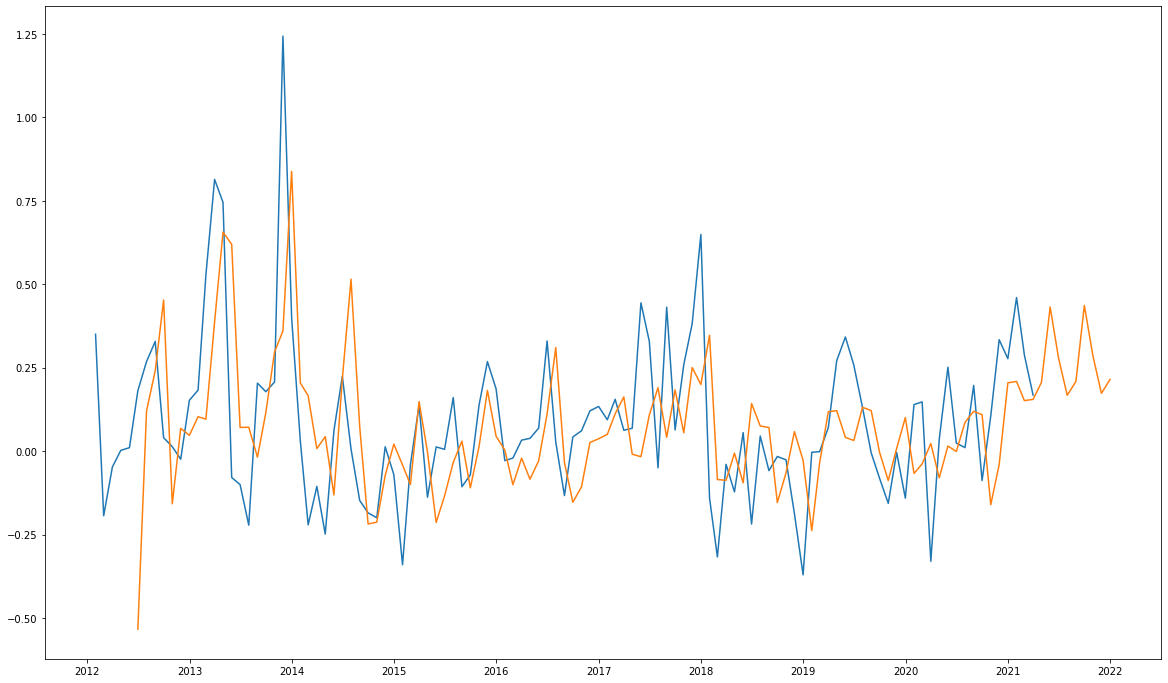

In [38]:
plt.figure(figsize=(20, 12))
plt.plot(df_month.Weighted_Price)
plt.plot(forecast)
plt.show()